plot mass distribution in CGM for different phases 

In [24]:
#### PLOT ####
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

## in the order of cold, cool, warm, hot
cgm_rvir  = np.asarray([5.20e+09, 2.07e+09, 4.49e+09, 1.25e+08])
cgm_15kpc = np.asarray([1.73e+08, 2.05e+07, 1.44e+07, 1.44e+07])

f_cgm_rvir = cgm_rvir/cgm_rvir.sum()
f_cgm_15kpc = cgm_15kpc/cgm_15kpc.sum()
y_rvir = cgm_rvir/1e9
y_15kpc = cgm_15kpc/1e9 

x = ['Cold', 'Cool', 'Warm', 'Hot']

from foggie.utils import consistency
cmap = consistency.temperature_discrete_cmap
c_cold = cmap(0.05)
c_cool = cmap(0.25)
c_warm = cmap(0.6)
c_hot = cmap(0.9)

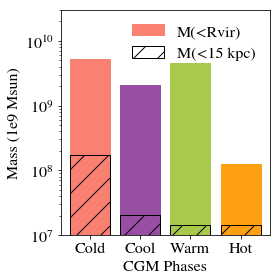

In [25]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
barlist = ax.bar(x, cgm_rvir, label='M(<Rvir)')
barlist2 = ax.bar(x, cgm_15kpc, linewidth=1, hatch="/", edgecolor='black', facecolor='none', label='M(<15 kpc)')

barlist[0].set_color(c_cold)
barlist[1].set_color(c_cool)
barlist[2].set_color(c_warm)
barlist[3].set_color(c_hot)

ax.tick_params(labelsize=16)
ax.set_xlabel('CGM Phases', fontsize=16)
ax.set_ylabel('Mass (1e9 Msun)', fontsize=16)
ax.legend(fontsize=16, frameon=False)
ax.set_yscale('log')
ax.set_ylim(1e7, 3e10)

#ax.text(-0.2, 6e9, '%.1f'%(0.437*100)+'%', fontsize=16)
#ax.text(0.8, 2.3e9, '%.1f'%(f_cgm_rvir[1]*100)+'%', fontsize=16)
#ax.text(1.8, 4.9e9, '%.1f'%(f_cgm_rvir[2]*100)+'%', fontsize=16)
#ax.text(2.85, 1.4e8, '%.1f'%(f_cgm_rvir[3]*100)+'%', fontsize=16)
fig.tight_layout()
# fig.savefig('figs_for_paper/fig_cgm_mass.pdf')

Make a similar plot as that of the Werk+2014

In [123]:
#### PLOT ####
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

## in the order of cold, cool, warm, hot
frac_mw = np.asarray([0.87, 0.07, 0.02, 0.06, 0.0016])
frac_low_w14 = np.asarray([0.14, np.nan, 0.25, 0.05, 0.02])
frac_high_w14 = np.asarray([0.24, np.nan, 0.45, 0.37, 0.06])

# x = ['Disk', 'Cold', 'Cool', 'Warm', 'Hot']
x_mid = np.asarray([1, 3.5, 6, 8.5, 11])
bw = 1.0
x_mw = x_mid - bw/2.
x_w14 = x_mid + bw/2.

from foggie.utils import consistency
cmap = consistency.temperature_discrete_cmap
c_cold = cmap(0.05)
c_cool = cmap(0.25)
c_warm = cmap(0.6)
c_hot = cmap(0.9)

color_list = [plt.cm.Blues(0.7), c_cold, c_cool, c_warm, c_hot]

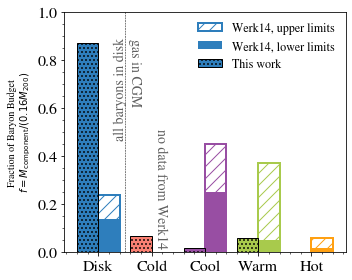

In [127]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
barlist_high = ax.bar(x_w14, frac_high_w14, linewidth=2, 
                      hatch="//", width=bw, color='none', 
                      edgecolor=color_list,label='Werk14, upper limits')
barlist_low = ax.bar(x_w14, frac_low_w14, width=bw, color=color_list, 
                     label='Werk14, lower limits')
barlist = ax.bar(x_mw, frac_mw, label='This work', width=bw, 
                 hatch="...", color=color_list, edgecolor='k')

#for i, ic in enumerate(color_list):
#    barlist[i].set_color(ic)
    #barlist_high[i].set_color(ic)
#    barlist_low[i].set_color(ic)
    
ax.tick_params(labelsize=16)
ax.set_xticks(x_mid)
ax.set_xticklabels(['Disk', 'Cold', 'Cool', 'Warm', 'Hot'])
# ax.set_ylabel('Mass (1e9 Msun)', fontsize=16)
ax.legend(fontsize=12, frameon=False)
# ax.set_yscale('log')
ax.set_ylim(0, 1)
ax.minorticks_on()
ax.vlines(2.27, 0, 1, linestyle='--', lw=0.5)
ax.text(1.7, 0.48, 'all baryons in disk', rotation=90, fontsize=14, color=plt.cm.Greys(0.7))
ax.text(2.4, 0.62, 'gas in CGM', rotation=-90, fontsize=14, color=plt.cm.Greys(0.7))
ax.text(3.6, 0.03, 'no data from Werk14', rotation=-90, fontsize=14, color=plt.cm.Greys(0.7))
ax.set_ylabel('Fraction of Baryon Budget\n'+ r'$f=M_{\rm component}/(0.16 M_{200})$')

#ax.text(-0.2, 6e9, '%.1f'%(0.437*100)+'%', fontsize=16)
#ax.text(0.8, 2.3e9, '%.1f'%(f_cgm_rvir[1]*100)+'%', fontsize=16)
#ax.text(1.8, 4.9e9, '%.1f'%(f_cgm_rvir[2]*100)+'%', fontsize=16)
#ax.text(2.85, 1.4e8, '%.1f'%(f_cgm_rvir[3]*100)+'%', fontsize=16)
fig.tight_layout()
fig.savefig('figs_for_paper/fig_cgm_mass_W14.pdf')

In [79]:
from astropy.cosmology import Planck15 as cosmo

In [84]:
cosmo.Ob(z=0.102)/cosmo.Om(z=0.102)

0.15804878048780485

plot cumulative mass distribution to test missing baryons 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

In [22]:
from astropy.cosmology import Planck15 as cosmo
z = 0.102

m_halo = 4.94e11 # Msun 
m_bary = cosmo.Ob(z)/cosmo.Om(z)*mhalo

m_star = 5.37e10
m_ism = 1.82e10
m_cgm_cold = 5.2e9 
m_cgm_cool = 2.1e9 
m_cgm_warm = 4.5e9 
m_cgm_hot = 1.3e8 

frac = np.array([m_star, m_ism, m_cgm_cold, m_cgm_cool, m_cgm_warm, m_cgm_hot])/m_bary
cum_frac = np.array([frac[0], frac[:2].sum(), frac[:3].sum(), 
                     frac[:4].sum(), frac[:5].sum(), frac[:6].sum()])

(0, 1)

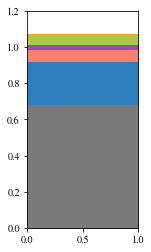

In [38]:
fig = plt.figure(figsize=(2, 4))
ax = fig.add_subplot(111)
ax.fill_between([0, 1], 0, cum_frac[0], color=plt.cm.Greys(0.6))
ax.fill_between([0, 1], cum_frac[0], cum_frac[1], color=plt.cm.Blues(0.7))
ax.fill_between([0, 1], cum_frac[1], cum_frac[2], color=c_cold)
ax.fill_between([0, 1], cum_frac[2], cum_frac[3], color=c_cool)
ax.fill_between([0, 1], cum_frac[3], cum_frac[4], color=c_warm)
ax.fill_between([0, 1], cum_frac[4], cum_frac[5], color=c_hot)
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 1)
ax.set_xlabel()

In [37]:
cum_frac[-1], cum_frac[5]

(1.0736960813715197, 1.0736960813715197)

In [ ]:
cosmo.Om(z)/cos